In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['insurance.csv']


In [2]:
df= pd.read_csv("../input/insurance.csv")

In [3]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
x=df.iloc[:,:5].values
y=df.iloc[:,6].values
print(x[:5])
print(y[:5])

[[19 'female' 27.9 0 'yes']
 [18 'male' 33.77 1 'no']
 [28 'male' 33.0 3 'no']
 [33 'male' 22.705 0 'no']
 [32 'male' 28.88 0 'no']]
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


<Figure size 432x288 with 0 Axes>

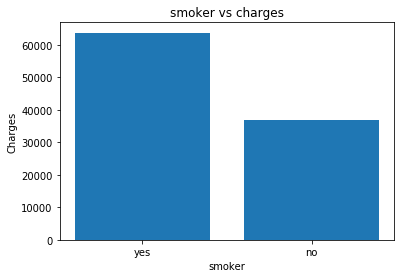

<Figure size 432x288 with 0 Axes>

In [5]:
plt.bar(df['smoker'],y,)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs charges')
plt.figure()

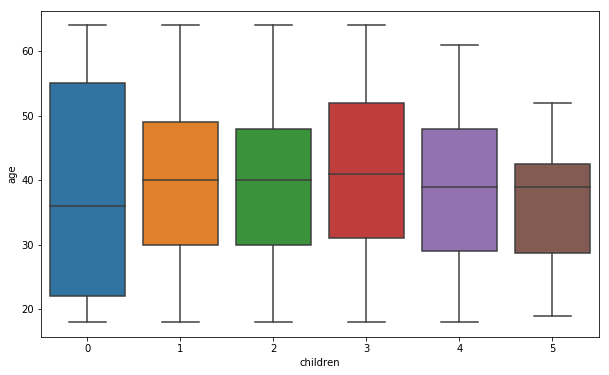

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children',y='age',data=df)
plt.show()

<Figure size 1008x576 with 0 Axes>

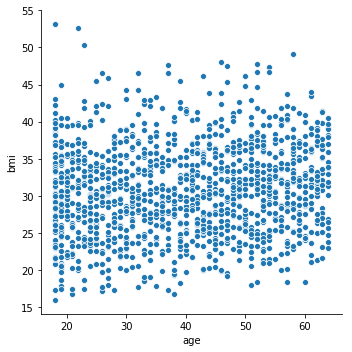

In [7]:
plt.figure(figsize=(14,8))
sns.relplot(x='age',y='bmi',data=df)
plt.show()

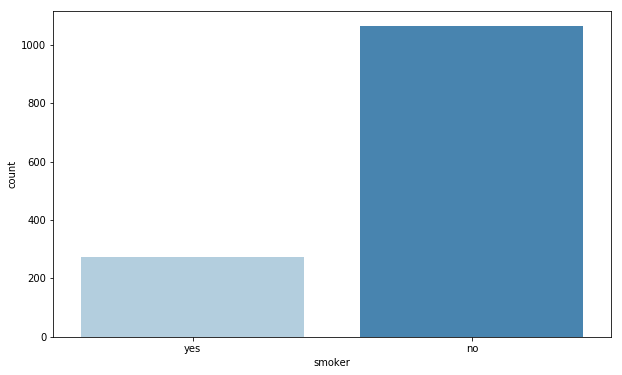

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=df,palette='Blues')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
label_x= LabelEncoder()
x[:,1]=label_x.fit_transform(x[:,1])
x[:,4]=label_x.fit_transform(x[:,4])
print("The first five row of input variable \n",x[:5])

The first five row of input variable 
 [[19 0 27.9 0 1]
 [18 1 33.77 1 0]
 [28 1 33.0 3 0]
 [33 1 22.705 0 0]
 [32 1 28.88 0 0]]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
lin_regressor= LinearRegression()
lin_regressor.fit(x_train,y_train)
y_predict=lin_regressor.predict(x_test)
score=lin_regressor.score(x_test,y_test)
print("Linear Regression Accuracy is",score*100)


Linear Regression Accuracy is 79.52171980481992


In [14]:
from sklearn.tree import DecisionTreeRegressor
dec_regressor= DecisionTreeRegressor(criterion='mse',random_state=0)
dec_regressor.fit(x_train,y_train)
score=dec_regressor.score(x_test,y_test)
print("Decesion Tree Regression Accuracy score is ", score*100)

Decesion Tree Regression Accuracy score is  70.66938232389572


In [15]:
from sklearn.ensemble import RandomForestRegressor
rand_regressor= RandomForestRegressor(n_estimators=10,random_state=0)
rand_regressor.fit(x_train,y_train)
score=rand_regressor.score(x_test,y_test)
print("Random Forest Regression Accuracy score is ", score*100)

Random Forest Regression Accuracy score is  85.29691963994912
